**Support vector machine** l√† m·ªôt m√¥ h√¨nh h·ªçc m√°y m·∫°nh m·∫Ω v√† linh ho·∫°t, c√≥ kh·∫£ nƒÉng linear ho·∫∑c non-linear classification, regression, th·∫≠m ch√≠ l√† ph√°t hi·ªán m·ªõi. SVM ho·∫°t ƒë·ªông r·∫•t t·ªët v·ªõi c√°c t·∫≠p d·ªØ li·ªáu v·ª´a v√† nh·ªè (v√†i trƒÉm ƒë·∫øn v√†i ngh√¨n instances), ƒë·∫∑c bi·ªát v·ªõi c√°c task ph√¢n lo·∫°i. Tuy nhi√™n, n√≥ kh√¥ng scale t·ªët v·ªõi c√°c t·∫≠p d·ªØ li·ªáu r·∫•t l·ªõn

In [7]:
import matplotlib.pyplot as plt

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [8]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

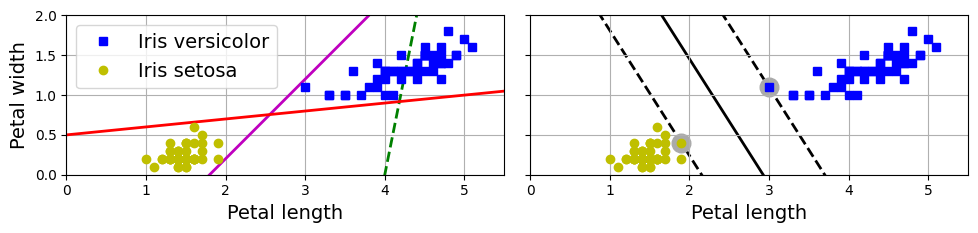

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = iris.target # type: ignore

setosa_or_vesicolor = (y == 0) | (y == 1)
X = X[setosa_or_vesicolor]
y = y[setosa_or_vesicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

Theo h√¨nh train ta th·∫•y nh·ªØng ƒëi·ªÉm d·ªØ li·ªáu l√† *linear separable*. H√¨nh b√™n tr√°i th·ªÉ hi·ªán decision boundaries c·ªßa 3 classifiers. M√¥ h√¨nh c√≥ decision boundary ƒë∆∞·ª£c bi·ªÉu di·ªÖn b·∫±ng ƒë∆∞·ªùng ƒë·ª©t n√©t t·ªá ƒë·∫øn m·ª©c n√≥ th·∫≠m ch√≠ kh√¥ng ph√¢n t√°ch c√°c l·ªõp m·ªôt c√°ch ch√≠nh x√°c. Hai model c√≤n l·∫°i l√†m vi·ªác t·ªët v·ªõi training set nh∆∞ng decision boundary c·ªßa ch√∫ng qu√° g·∫ßn v·ªõi c√°c instance n√™n model c√≥ th·ªÉ s·∫Ω kh√¥ng ho·∫°t ƒë·ªông t·ªët v·ªõi c√°c instances m·ªõi.

Ng∆∞·ª£c l·∫°i, ƒë∆∞·ªùng n√©t li·ªÅn trong bi·ªÉu ƒë·ªì b√™n ph·∫£i bi·ªÉu di·ªÖn decision boundary c·ªßa classifier SVM; ƒë∆∞·ªùng n√†y kh√¥ng ch·ªâ ph√¢n t√°ch hai l·ªõp m√† c√≤n gi·ªØ kho·∫£ng c√°ch xa nh·∫•t c√≥ th·ªÉ v·ªõi c√°c tr∆∞·ªùng h·ª£p ƒë√†o t·∫°o g·∫ßn nh·∫•t. C√≥ th·ªÉ nghƒ© SVM classifier n·∫±m  trong kho·∫£ng gi·ªØa 2 ƒë∆∞·ªùng n√©t ƒë·ª©t (g·ªçi l√† *large margin classification*)

Th√™m c√°c instances ngo√†i kho·∫£ng t·∫°o b·ªùi 2 ƒë∆∞·ªùng ƒë·ª©t (off the street) s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng t·ªõi decision boudaries, c√°c ranh gi·ªõi n√†y ƒë∆∞·ª£c x√°c ƒë·ªãnh (ho·∫∑c "support") v·ªõi c√°c instances n·∫±m tr√™n c·∫°nh c·ªßa n√≥ g·ªçi l√† **support vector** (ƒë∆∞·ª£c khoanh tr√≤n ·ªü tr√™n)

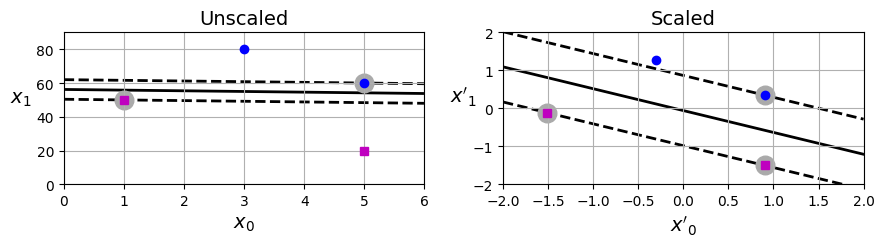

In [10]:
# extra code ‚Äì this cell generates and saves Figure 5‚Äì2

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$¬†¬†¬†¬†", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90]) # type: ignore
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2]) # type: ignore
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

**L∆∞u √Ω: SVM r·∫•t nh·∫°y c·∫£m v·ªõi `feature scale` ·ªü b√™n ·∫£nh tr√°i tr·ª•c d·ªçc l·ªõn h∆°n nhi·ªÅu so v·ªõi tr·ª•c ngang, ƒë·ªô r·ªông street (kho·∫£ng c√°ch gi·ªØa 2 ƒë∆∞·ªùng ƒë·ª©t) s·∫Ω nh·ªè h∆°n v√† g·∫ßn v·ªõi ƒë∆∞·ªùng ngang, sau khi th·ª±c hi·ªán bi·∫øn ƒë·ªïi ta ƒë∆∞·ª£c bi·ªÉu ƒë·ªì b√™n ph·∫£i tr√¥ng c√≥ v·∫ª ƒë·∫πp h∆°n**

## Soft Margin Classification

N·∫øu ch√∫ng ta mu·ªën √°p ƒë·∫∑t m·ªôt perfect classification, n√≥ ƒë∆∞·ª£c g·ªçi l√† **hard margin classification**. C√≥ 2 v·∫•n ƒë·ªÅ ch√≠nh

- N√≥ ch·ªâ kh·∫£ thi n·∫øu d·ªØ li·ªáu **linearly separable**
- R·∫•t nh·∫°y c·∫£m v·ªõi nhi·ªÖu

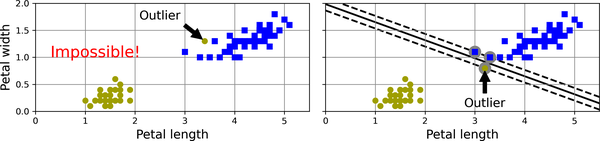

C·∫ßn ph·∫£i s·ª≠ d·ª•ng c√°c m√¥ h√¨nh linh ho·∫°t h∆°n. M·ª•c ti√™u l√† t√¨m ra s·ª± c·∫ßn b·∫±ng gi·ªØa vi·ªác gi·ªØ cho street l·ªõn nh·∫•t c√≥ th·ªÉ (c√°c v·∫°ch ƒë·ª©t g·∫ßn v·ªõi t·ª´ng c·ª•m nh·∫•t c√≥ th·ªÉ) v√† h·∫°n ch·∫ø c√°c **margin violation**. N√≥ ƒë∆∞·ª£c g·ªçi l√† **soft margin classification**

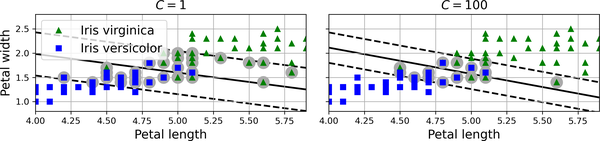

Khi s·ª≠ d·ª•ng SVM trong scikit-learn c·∫ßn hi·ªáu ch·ªânh m·ªôt v√†i hyperparameter. v√≠ d·ª• tr√™n h√¨nh C nh·ªè c√≥ th·ªÉ l√†m street l·ªõn nh∆∞ng c√≥ nhi·ªÅu margin violations h∆°n, m·∫∑t kh√°c gi·∫£m C d·∫´n ƒë·∫øn nhi·ªÅu instances support street h∆°n l√†m gi·∫£m overfitting, nh∆∞ng n·∫øu nhi·ªÅu qu√° c√≥ th·ªÉ d·∫´n ƒë·∫øn underfitting nh∆∞ v√≠ d·ª• ·ªü tr√™n

In [11]:
# trains a linear SVM classifier to detect Iris virginica flowers

from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = (iris.target == 2) # type: ignore

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [12]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [13]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

# Nonlinear SVM Classification

M·ªôt SVM classifiers hi·ªáu qu·∫£ v√† th∆∞·ªùng ho·∫°t ƒë·ªông r·∫•t t·ªët, nhi·ªÅu t·∫≠p d·ªØ li·ªáu th·∫≠m ch√≠ c√≤n kh√¥ng g·∫ßn v·ªõi linearly separable. M·ªôt c√°ch ti·∫øp c·∫≠n ƒë·ªÉ x·ª≠ l√≠ c√°c nonlinear datasets l√† th√™m c√°c feature. V√≠ d·ª• nh∆∞ c√°c feature polynomial, trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p ƒëi·ªÅu n√†y c√≥ th·ªÉ d·∫´n ƒë·∫øn m·ªôt dataset linearly separable

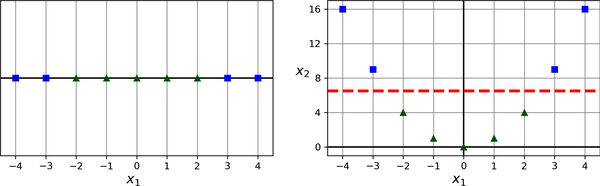

V√≠ d·ª•: h√¨nh b√™n tr√°i ch·ªâ c√≥ m·ªôt feature $x_1$ v√† kh√¥ng linearly separable, th√™m feature $x_2 = x_1^2$ l√† ƒë∆∞·ª£c h√¨nh b√™n tr√°i v√† ƒë√£ ƒë∆∞·ª£c 1 dataset linearly separable

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) # type: ignore
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # type: ignore

In [15]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [16]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42, max_iter=10_000)
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

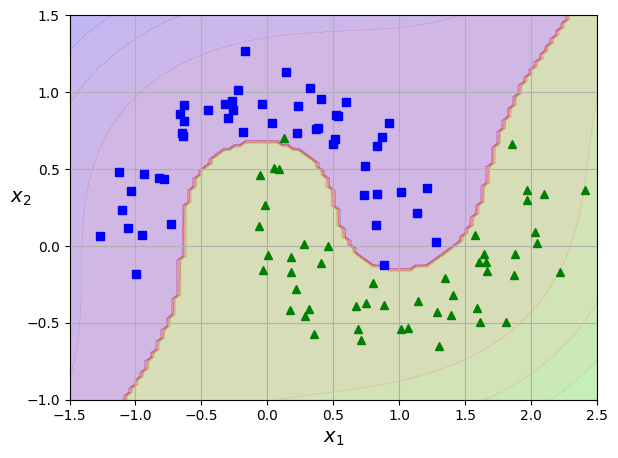

In [17]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

Vi·ªác th√™m c√°c polynomial features c√≥ th·ªÉ th·ª±c hi·ªán m·ªôt c√°c ƒë∆°n gi·∫£n v√† ho·∫°t ƒë·ªông t·ªët v·ªõi c√°c thu·∫≠t to√°n ML (kh√¥ng ch·ªâ SVM). Tuy nhi√™n, n·∫øu th√™m v√†o √≠t s·∫Ω kh√¥ng th·ªÉ gi·∫£i quy·∫øt ƒë∆∞·ª£c c√°c datasets ph·ª©c t·∫°p, tuy nhi√™n n·∫øu th√™m nhi·ªÅu th√¨ s·∫Ω t·∫°o ra m·ªôt s·ªë l∆∞·ª£ng l·ªõn c√°c features, c√≥ th·ªÉ l√†m m√¥ h√¨nh r·∫•t ch·∫≠m.

Khi s·ª≠ d·ª•ng SVM c√≥ th·ªÉ √°p d·ª•ng m·ªôt kƒ© thu·∫≠t to√°n h·ªçc ƒë·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ n√†y g·ªçi l√† `kernel trick`. Kernel trick gi√∫p ta c√≥ th·ªÉ c√≥ ƒë∆∞·ª£c k·∫øt qu·∫£ t∆∞∆°ng t·ª± khi th√™m nhi·ªÅu polynomial features, th·∫≠m ch√≠ v·ªõi b·∫≠c r·∫•t cao m√† kh√¥ng th·ª±c s·ª± ph·∫£i th√™m ch√∫ng v√†o.

In [18]:
# test kernel trick with moon datasets

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

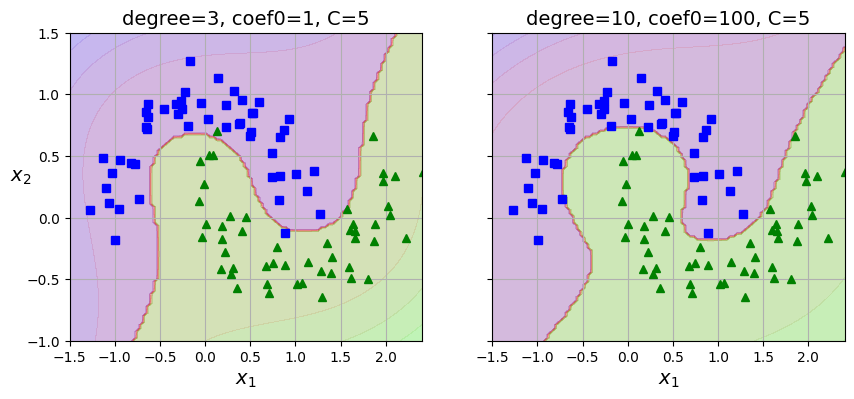

In [19]:
from numpy import poly


poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=10, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

N·∫øu m√¥ h√¨nh b·ªã overfittingm ta c√≥ th·ªÉ th·ª≠ gi·∫£m `degree` v√† ng∆∞·ª£c l·∫°i. Hyperparameter `coef0` ki·∫øm so√°t m·ª©c ƒë·ªô m√¥ h√¨nh b·ªã ·∫£nh h∆∞·ªüng b·ªüi c√°c feature b·∫≠c cao v√† th·∫•p

## Similarity Features

M·ªôt k·ªπ thu·∫≠t kh√°c ƒë·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ nonlinear l√† th√™m c√°c features ƒë∆∞·ª£c t√≠nh to√°n b·∫±ng similarity function (h√†m t∆∞∆°ng t·ª±), ƒëo m·ª©c ƒë·ªô gi·ªëng nhau c·ªßa tr·ª´ng instance v·ªõi m·ªôt m·ªëc c·ª• th·ªÉ



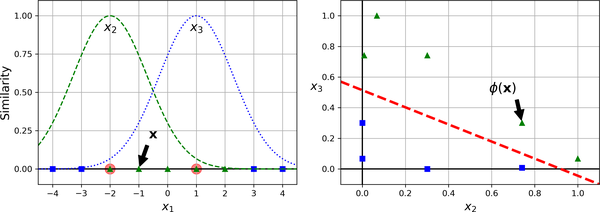

V√≠ d·ª•: t·ª´ b·ªô d·ªØ li√™u 1 chi·ªÅu th√™m 2 m·ªëc $x_1=-2$ v√† $x_1=1$. Ch√∫ng ta s·∫Ω ƒë·ªãnh nghƒ©a `similarity function` l√† `RBF Gaussian` v·ªõi $\gamma = 0.3$, t·ª©c l√† h√†m h√¨nh chu√¥ng thay ƒë·ªïi t·ª´ 0 (r·∫•t xa ƒëi·ªÉm m·ªëc) ƒë·∫øn 1 (t·∫°i ƒëi·ªÉm m·ªëc). T·∫°i h√¨nh tr√™n instance $x_1=-1$ n√≥ c√°ch m·ªëc ƒë·∫ßu ti√™n 1 v√† m·ªëc th·ª© hai l√† 2. Do ƒë√≥ c√°c feature m·ªõi l√† $x_2=\operatorname{exp}(-0.3 \times 1^2) \approx 0.74$ v√† $x_3=\operatorname{exp}(-0.3 \times 2^2) \approx 0.30$. H√¨nh b√™n ph·∫£i cho th·∫•y t·∫≠p d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi (b·ªè feature g·ªëc t·ª©c l√† $x_1$), v√† n√≥ ƒë√£ linear separable

**L√†m th·∫ø n√†o ƒë·ªÉ ch·ªçn ƒëi·ªÉm m·ªëc ?**

C√°ch ti·∫øp c·∫≠n ƒë∆°n gi·∫£n nh·∫•t l√† t·∫°o ƒëi·ªÉm m·ªëc t·∫°i t·ª´ng instance trong dataset. L√†m nh∆∞ v·∫≠y s·∫Ω t·∫°o ra nhi·ªÅu chi·ªÅu v√† do ƒë√≥ s·∫Ω l√†m tƒÉng kh·∫£ nƒÉng training set sau khi bi·∫øn ƒë·ªïi l√† linearly separable.

Nh∆∞·ª£c ƒëi·ªÉm l√† n·∫øu training set l√† t·∫≠p c√≥ `m` instance v√† `n` features th√¨ s·∫Ω ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi th√†nh `m` instance v√† `m` features (gi·∫£ s·ª≠ ƒë√£ b·ªè ƒëi c√°c feature g·ªëc). N·∫øu dataset l·ªõn, ta s·∫Ω c√≥ m·ªôt t·∫≠p features l·ªõn t∆∞∆°ng ƒë∆∞∆°ng

## Gaussian RBF Kernel

Gi·ªëng nh∆∞ `Polinomial feature`, `similarity features` c≈©ng r·∫•t h·ªØu √≠ch v·ªõi b·∫•t k·ª≥ thu·∫≠t to√°n ML n√†o, nh∆∞ng ƒë·ªô ph·ª©c t·∫°p l·ªõn ƒë·ªÉ t√≠nh to√°n t·∫•t c·∫£ c√°c features ƒë∆∞·ª£c th√™m v√†o (ƒë·∫∑c bi·ªát v·ªõi c√°c training set l·ªõn). `Gaussian RBF kernel` c≈©ng l√† m·ªôt th·ªß thu·∫≠t gi√∫p ch√∫ng ta c√≥ k·∫øt qu·∫£ nh∆∞ th√™m c√°c feature nh∆∞ng kh√¥ng th·ª±c s·ª± l√†m nh∆∞ v·∫≠y

In [20]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

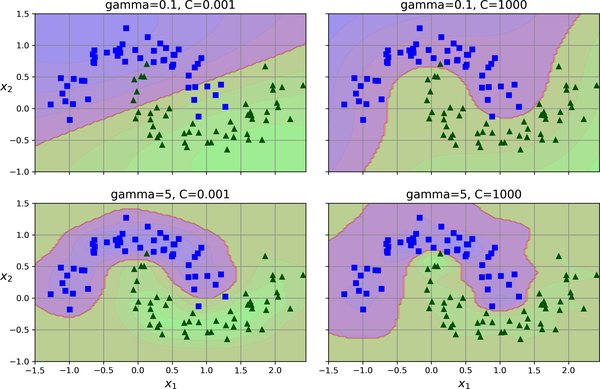

TƒÉng gamma l√†m cho ƒë∆∞·ªùng cong h√¨nh chu√¥ng h·∫πp h∆°n. Do ƒë√≥, ph·∫°m vi ·∫£nh h∆∞·ªüng c·ªßa m·ªói instance nh·ªè h∆°n: decision boundary cu·ªëi c√πng tr·ªü n√™n b·∫•t th∆∞·ªùng h∆°n, dao ƒë·ªông quanh c√°c tr∆∞·ªùng h·ª£p ri√™ng l·∫ª.

Ng∆∞·ª£c l·∫°i v·ªõi gamma nh·ªèm c√°c instance c√≥ ph·∫°m vi ·∫£nh h∆∞·ªüng l·ªõn h∆°n v√† decision boundary m∆∞·ª£t m√† h∆°n.

$\Rightarrow$ gamma ho·∫°t ƒë·ªông nh∆∞ m·ªôt regularization hyperparameter, n·∫øu m√¥ h√¨nh overfitting th√¨ gi·∫£m, underfitting th√¨ tƒÉng.

**C√≤n m·ªôt v√†i c√°c lo·∫°i kernel kh√°c nh∆∞ng √≠t khi ƒë∆∞·ª£c s·ª≠ d·ª•ng**

## SVM Classes and Computational Complexity

`LinearSVC` d·ª±a tr√™n th∆∞ vi·ªán $liblinear$, th∆∞ vi·ªán n√†y tri·ªÉn khai m·ªôt thu·∫≠t to√°n ƒë∆∞·ª£c t·ªëi ∆∞u cho linear SVMs. N√≥ kh√¥ng h·ªó tr·ª£ kernel trick, nh∆∞ng n√≥ ƒë∆∞·ª£c m·ªü r·ªông g·∫ßn nh∆∞ tuy·∫øn t√≠nh v·ªõi s·ªë l∆∞·ª£ng training instances v√† s·ªë l∆∞·ª£ng features. ƒê·ªô ph·ª©c t·∫°p ƒë√†o t·∫°o c·ªßa n√≥ x·∫•p x·ªâ $O(m \times n)$. S·∫Ω m·∫•t th·ªùi gian h∆°n n·∫øu y√™u c·∫ßu ƒë·ªô ch√≠nh x√°c cao. N√≥ ƒë∆∞·ª£c ƒëi·ªÅu khi·ªÉn b·ªüi hyperparameter $\epsilon$ (dung sai, g·ªçi l√† `tol` trong Scikit-learn)

`SVC` d·ª±a tr√™n th∆∞ vi·ªán $libsvm$, n√≥ tri·ªÉn khai m·ªôt thu·∫≠t to√°n h·ªó tr·ª£ kernel trick. Th·ªùi gian hu·∫•n luy·ªán th∆∞·ªùng trong kho·∫£ng $O(m^2 \times n)$ v√† $O(m \times n)$. N√≥ s·∫Ω c·ª±c k·ª≥ ch·∫≠m khi training set l·ªõn (v√†i trƒÉm ngh√¨n m·∫´u), v√¨ v·∫≠y n√≥ ho·∫°t ƒë·ªông t·ªët nh·∫•t cho b·ªô d·ªØ li·ªáu v·ª´a v√† nh·ªè. N√≥ c√≥ kh·∫£ nƒÉng m·ªü r·ªông t·ªët theo s·ªë l∆∞·ª£ng features, ƒë·∫∑c bi·ªát l√† v·ªõi sparse featues. Trong tr∆∞·ªùng h·ª£p n√†y. Trong tr∆∞·ªùng h·ª£p n√†y, thu·∫≠t to√°n s·∫Ω m·ªü r·ªông theo s·ªë l∆∞·ª£ng trung b√¨nh c√°c t√≠nh nƒÉng kh√°c kh√¥ng tr√™n m·ªói tr∆∞·ªùng h·ª£p.

`SGD Classifier` c≈©ng th·ª±c hi·ªán ph√¢n lo·∫°i large margin theo m·∫∑c ƒë·ªãnh v√† c√°c hyperparameter c·ªßa n√≥ - ƒë·∫∑c bi·ªát l√† c√°c regularization hyperparameters (`alpha` v√† `penalty`) v√† `learning_rate` c√≥ th·ªÉ ƒë∆∞·ª£c ch·ªânh s·ª≠a ƒë·ªÉ c√≥ k·∫øt qu·∫£ t∆∞∆°ng t·ª± v·ªõi linear SVMs. ƒê·ªÉ ƒë√†o t·∫°o n√≥ s·ª≠ d·ª•ng SGD, cho ph√©p h·ªçc gia tƒÉng v√† t·ªën √≠t b·ªô nh·ªõ do ƒë√≥ b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng n√≥ ƒë·ªÉ ƒë√†o t·∫°o m·ªôt m√¥ h√¨nh tr√™n m·ªôt t·∫≠p d·ªØ li·ªáu l·ªõn kh√¥ng v·ª´a v·ªõi RAM (out-of-core). H∆°n n·ªØa, n√≥ c√≥ kh·∫£ nƒÉng m·ªü r·ªông r·∫•t t·ªët, v√¨ ƒë·ªô ph·ª©c t·∫°p t√≠nh to√°n c·ªßa n√≥ l√† $O(m \times n)$

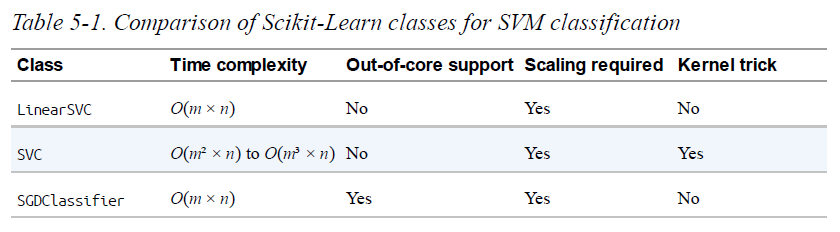

# SVM Regression

ƒê·ªÉ s·ª≠ d·ª•ng SVMs cho regression thay v√¨ classification: thay v√¨ c·ªë g·∫Øng ƒë∆∞a street l·ªõn nh·∫•t c√≥ th·ªÉ v√†o gi·ªØa 2 l·ªõp trong khi h·∫°n ch√™ margin violations. SVM Regression c·ªë g·∫Øng fit c√†ng nhi·ªÅu tr∆∞·ªùng h·ª£p c√†ng t·ªët tr√™n street trong khi h·∫°n ch·∫ø margin violations.

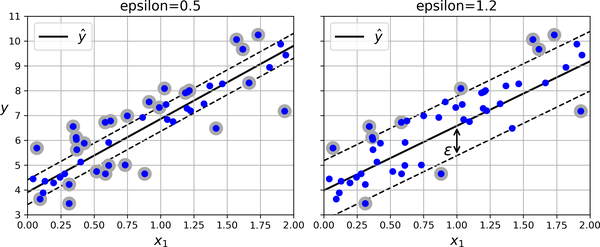

Gi·∫£m $\epsilon$ l√†m tƒÉng support vector, gi√∫p ƒëi·ªÅu ch·ªânh m√¥ h√¨nh. Th√™m n·ªØa, n·∫øu th√™m nhi·ªÅu tr∆∞·ªùng h·ª£p ƒë√†o t·∫°o h∆°n trong ph·∫°m vi bi√™n, ƒëi·ªÅu n√†y s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh. Do ƒë√≥ m√¥ h√¨nh ƒë∆∞·ª£c cho l√† $\epsilon-insensitive$

In [21]:
from sklearn.svm import LinearSVR

# extra code ‚Äì these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg.fit(X, y)

svm_reg.predict([[1.5]])

array([7.88029452])

In [22]:
from sklearn.svm import SVR

# extra code ‚Äì these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

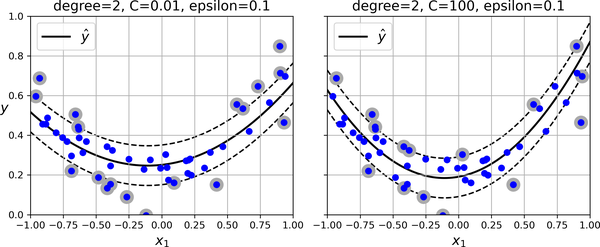

# Under the Hood of Linear SVM Classifiers

Linear SVM Classifiers d·ª± ƒëo√°n m·ªôt instance m·ªõi $\mathbf{x}$ b·∫±ng c√°ch t√≠nh h√†m quy·∫øt ƒë·ªãnh $\mathbf{\theta}^T \mathbf{x}$ = $\theta_0x_0 + ... + \theta_nx_n$ v·ªõi $x_0$ l√† bias feature (lu√¥n b·∫±ng 1). N·∫øu k·∫øt qu·∫£ d∆∞∆°ng th√¨ l√† positive class v√† ng∆∞·ª£c l·∫°i. (G·∫ßn gi·ªëng v·ªõi `LogicsticRegression`)

V·ªÅ ƒë√†o t·∫°o vi·ªác n√†y ƒë√≤i h·ªèi ph·∫£i t√¨m vector tr·ªçng s·ªë $\mathbf{w}$ v√† bias $b$ l√†m cho street, hay margin r·ªông nh·∫•t c√≥ th·ªÉ trong khi h·∫°n ch·∫ø s·ªë l∆∞·ª£ng margin violations. ƒê·ªÉ l√†m cho n√≥ l·ªõn h∆°n c·∫ßn $\mathbf{w}$ nh·ªè h∆°n

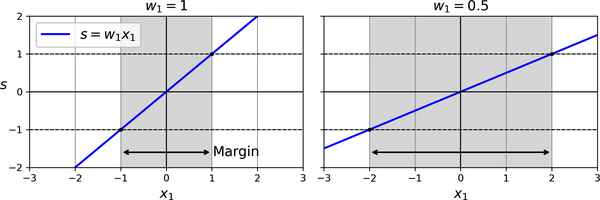

Gi·∫£ s·ª≠ ƒë·ªãnh nghƒ©a ranh gi·ªõi c·ªßa street l√† ƒëi·ªÉm m√† h√†m quy·∫øt ƒë·ªãnh b·∫±ng 1 ho·∫∑c -1. Do ƒë√≥ $w_1 = 1$ chi·ªÅu r·ªông = 2, $w_1 = 0.5$ chi·ªÅu r·ªông b·∫±ng 4. V√¨ v·∫≠y ph·∫£i gi·ªØ $\mathbf{w}$ nh·ªè nh·∫•t c√≥ th·ªÉ. 

Ta c·∫ßn ph·∫£i tr√°nh margin violations. V√¨ v·∫≠y ta c·∫ßn decision_function l·ªõn h∆°n 1 ƒë·ªïi v·ªõi c√°c positive instances v√† nh·ªè h∆°n -1 v·ªõi negative instances. ƒê·∫∑t $t^{(i)}=-1$ cho negative instances (khi $y^{(i)} = 0$) v√† $t^{(i)}=1$ (khi $y^{(i)} = 1$) ta c√≥ ƒë∆∞·ª£c bi·ªÉu th·ª©c $t^{(i)} (\mathbf{w}^T\mathbf{x}^{(i)} + b) \geq 1$ cho t·∫•t c·∫£ instances

Ch√∫ng ta c√≥ th·ªÉ bi·ªÉu th·ªã m·ª•c ti√™u cho hard margin linear SVM b·∫±ng c√¥ng th·ª©c sau

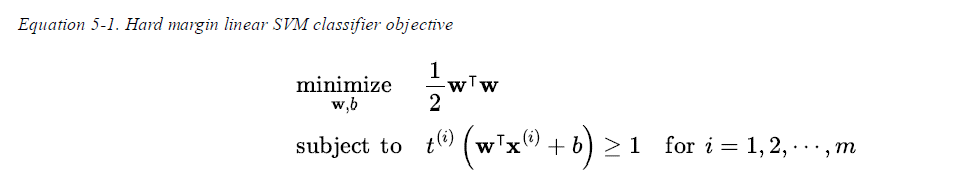

ƒê·ªëi v·ªõi m·ª•c ti√™u soft margin, ch√∫ng ta c·∫ßn th√™m *slack variable $\zeta^{(i)} \geq 0$* cho m·ªói instance. $\zeta^{(i)}$  ƒëo l∆∞·ªùng m·ª©c ƒë·ªô instance $i^{th}$ ƒë∆∞·ª£c ph√©p vi ph·∫°m bi√™n ƒë·ªô, ta c√≥ 2 m·ª•c ti√™u xung ƒë·ªôt nhau: l√†m slack variable nh·ªè nh·∫•t c√≥ th·ªÉ ƒë·ªÉ gi·∫£m margin violation, v√† l√†m $1/2 \mathbf{w}^T\mathbf{w}$ nh·ªè nh·∫•t c√≥ th·ªÉ ƒë·ªÉ tƒÉng margin. Hyperparameter C ƒë·ªÉ ch√∫ng ta ƒëi·ªÅu ch·ªânh m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa 2 m·ª•c ti√™u n√†y

Ch√∫ng ta c√≥ th·ªÉ bi·ªÉu th·ªã m·ª•c ti√™u cho soft margin linear SVM b·∫±ng c√¥ng th·ª©c sau

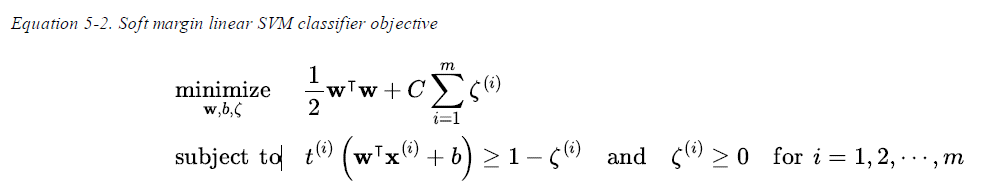

S·ª≠ d·ª•ng QP solver l√† m·ªôt c√°ch ƒë·ªÉ hu·∫•n luy·ªán SVM. M·ªôt c√°ch kh√°c l√† s·ª≠ d·ª•ng GD ƒë·ªÉ gi·∫£m thi·ªÉu *hinge loss* ho·∫∑c *squared hinge loss*. Cho m·ªôt instance $\mathbf{x}$ thu·ªôc class positive, loss = 0 n·∫øu output $s$ c·ªßa decision function $(s = \mathbf{w}^T\mathbf{x} + b)$ l·ªõn h∆°n ho·∫∑c b·∫±ng 1. v√† ng∆∞·ª£c l·∫°i cho m·ªôt instance thu·ªôc class negative, loss = 0 n·∫øu $s$ nh·ªè h∆°n b·∫±ng -1. C√†ng xa m·ªôt instance n·∫±m v·ªÅ ph√≠a ƒë√∫ng c·ªßa bi√™n loss c√†ng l·ªõn, n√≥ tƒÉng tuy·∫øn t√≠nh v·ªõi hinge loss v√† tƒÉng theo c·∫•p s·ªë nh√¢n v·ªõi squared hinge loss. Tuy nhi√™n n·∫øu dataset clean, n√≥ s·∫Ω h·ªôi t·ª• nhanh h∆°n.

M·∫∑c ƒë·ªãnh, LinearSVC s·ª≠ d·ª•ng squared hinge loss, trong khi SGDClassifier s·ª≠ d·ª•ng hinge loss. C·∫£ hai ƒë·ªÅu c√≥ th·ªÉ ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh b·∫±ng hyperparameter `loss` v·ªõi c√°c t√πy ch·ªçn l√† `hinge` ho·∫∑c `squared_hinge`

**QP Solver l√† g√¨ ?**

QP Solver (vi·∫øt t·∫Øt c·ªßa Quadratic Programming Solver) l√† m·ªôt tr√¨nh gi·∫£i b√†i to√°n l·∫≠p tr√¨nh b·∫≠c hai (Quadratic Programming ‚Äì QP).

ƒê√≥ l√† m·ªôt lo·∫°i b√†i to√°n t·ªëi ∆∞u h√≥a l·ªìi, trong ƒë√≥:
- H√†m m·ª•c ti√™u l√† m·ªôt h√†m b·∫≠c hai (t·ª©c l√† c√≥ d·∫°ng ch·ª©a b√¨nh ph∆∞∆°ng bi·∫øn s·ªë),
- C√°c r√†ng bu·ªôc l√† tuy·∫øn t√≠nh (linear constraints).

C·ª• th·ªÉ, b√†i to√°n QP c√≥ d·∫°ng:

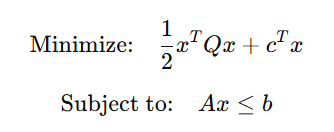

Trong ƒë√≥:
- ùë•: vector c√°c bi·∫øn c·∫ßn t√¨m
- ùëÑ: ma tr·∫≠n ƒë·ªëi x·ª©ng x√°c ƒë·ªãnh d∆∞∆°ng (cho h√†m b·∫≠c hai)
- ùëê: vector h·ªá s·ªë tuy·∫øn t√≠nh
- ùê¥,ùëè: bi·ªÉu di·ªÖn c√°c r√†ng bu·ªôc tuy·∫øn t√≠nh



# The Dual Problem

V·ªõi m·ªôt b√†i to√°n t·ªëi ∆∞u c√≥ r√†ng bu·ªôc, ƒë∆∞·ª£c g·ªçi l√† b√†i to√°n g·ªëc (**primal problem**), ng∆∞·ªùi ta c√≥ th·ªÉ c√≥ th·ªÉ bi·ªÉu di·ªÖn m·ªôt b√†i to√°n kh√°c nh∆∞ng c√≥ li√™n k·∫øt ch·∫∑t ch·∫Ω, g·ªçi l√† nh·ªØng b√†i to√°n ƒë·ªëi ng·∫´u (**dual problem**). **L·ªùi gi·∫£i c·ªßa b√†i to√°n ƒë·ªëi ng·∫´u th∆∞·ªùng cung c·∫•p m·ªôt c·∫≠n d∆∞·ªõi cho l·ªùi gi·∫£i c·ªßa b√†i to√°n g·ªëc**, nh∆∞ng trong m·ªôt s·ªë ƒëi·ªÅu ki·ªán nh·∫•t ƒë·ªãnh, **hai b√†i to√°n n√†y c√≥ th·ªÉ c√≥ c√πng l·ªùi gi·∫£i**.

B√†i to√°n SVM ƒë√°p ·ª©ng nh·ªØng ƒëi·ªÅu ki·ªán ƒë√≥, v√¨ th·∫ø ta c√≥ th·ªÉ ch·ªçn gi·∫£i b√†i to√°n g·ªëc ho·∫∑c b√†i to√°n ƒë·ªëi ng·∫´u, v√† c·∫£ hai s·∫Ω cho c√πng m·ªôt l·ªùi gi·∫£i

C√¥ng th·ª©c d·∫°ng ƒë·ªëi ng·∫´u c·ªßa h√†m m·ª•c ti√™u linearSVM

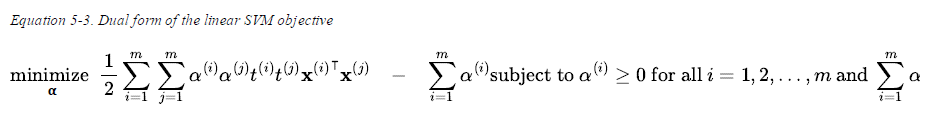

Khi t√¨m ƒë∆∞·ª£c vector $\hat{\mathbf{\alpha}}$ sao cho n√≥ l√† c·ª±c ti·ªÉu c·ªßa ph∆∞∆°ng tr√¨nh n√†y (d√πng QP Solver) s·ª≠ d·ª•ng ph∆∞∆°ng tr√¨nh sau ƒë·∫ø t√≠nh $\hat{\mathbf{w}}$ v√† $\hat{\mathbf{b}}$ m√† n√≥ l√† c·ª±c ti·ªÉu c·ªßa b√†i to√°n g·ªëc, $n_s$ ƒë·∫°i di·ªán cho s·ªë support vectors

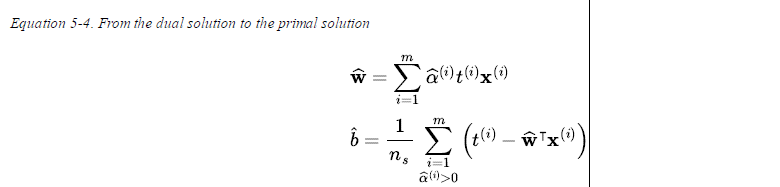

B√†i to√°n ƒë·ªëi ng·∫´u c√≥ th·ªÉ gi·∫£i ƒë∆∞·ª£c nhanh h∆°n b√†i to√°n g·ªëc n·∫øu s·ªë l∆∞·ª£ng m·∫´u nh·ªè h∆°n s·ªë features. Quan tr·ªçng h∆°n b√†i to√°n ƒë·ªìi ng·∫´u gi√∫p kernel trick (Kernelized SVM) tr·ªü n√™n kh·∫£ th√¨ trong khi b√†i to√°n g·ªëc th√¨ kh√¥ng

## Kernelized SVMs

Gi·∫£ s·ª≠ ta mu·ªën √°p d·ª•ng ph√©p bi·∫øn ƒë·ªïi ƒëa th·ª©c b·∫≠c hai v√†o m·ªôt t·∫≠p hu·∫•n luy·ªán hai chi·ªÅu (ch·∫≥ng h·∫°n nh∆∞ t·∫≠p d·ªØ li·ªáu ‚Äúmoons‚Äù), sau ƒë√≥ hu·∫•n luy·ªán m·ªôt b·ªô ph√¢n lo·∫°i SVM tuy·∫øn t√≠nh tr√™n t·∫≠p hu·∫•n luy·ªán ƒë√£ ƒë∆∞·ª£c bi·∫øn ƒë·ªïi. Ph∆∞∆°ng tr√¨nh sau cho th·∫•y h√†m √°nh x·∫° ƒëa th·ª©c b·∫≠c hai ùúô m√† b·∫°n mu·ªën √°p d·ª•ng:

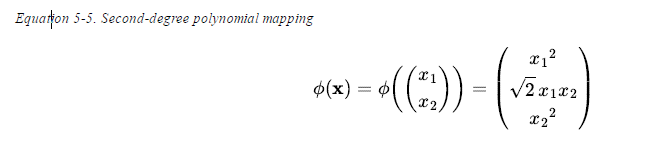

√Åp d·ª•ng c√¥ng th·ª©c cho c√°c vector 2 chi·ªÅu $\mathbf{a}$ v√† $\mathbf{b}$, n·∫øu ta th·ª±c hi·ªán √°nh x·∫° sau ƒë√≥ t√≠nh t√≠ch v√¥ h∆∞·ªõng

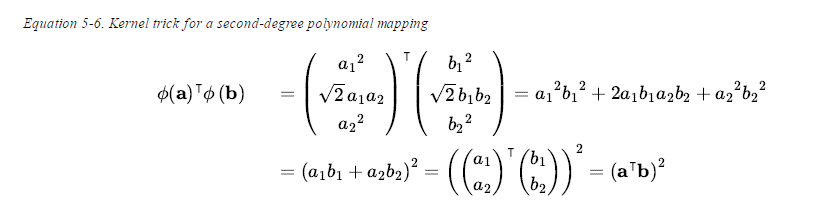

T√≠ch v√¥ h∆∞·ªõng c·ªßa c√°c vector sau khi bi·∫øn ƒë·ªïi b·∫±ng b√¨nh ph∆∞∆°ng t√≠ch v√¥ h∆∞·ªõng c·ªßa c√°c vector g·ªëc: $œï(\mathbf{a})^‚ä§ œï(\mathbf{b})=(\mathbf{a}^‚ä§ \mathbf{b})^2$

**ƒê√¢y l√† ƒëi·ªÅu quan tr·ªçng c·∫ßn ghi nh·ªõ:**

N·∫øu b·∫°n √°p d·ª•ng ph√©p bi·∫øn ƒë·ªïi $ùúô$ cho t·∫•t c·∫£ c√°c ƒëi·ªÉm d·ªØ li·ªáu hu·∫•n luy·ªán, th√¨ b√†i to√°n ƒë·ªëi ng·∫´u (ph∆∞∆°ng tr√¨nh 5-3) s·∫Ω ch·ª©a t√≠ch v√¥ h∆∞·ªõng $ùúô(\mathbf{x}^{(i)})^T ùúô(\mathbf{x}^{(j)})$

**N·∫øu** $ùúô$ l√† √°nh x·∫° ƒëa th·ª©c b·∫≠c hai ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü ph∆∞∆°ng tr√¨nh tr√™n c√≥ th·ªÉ thay t√≠ch v√¥ h∆∞·ªõng n√†y b·∫±ng $(\mathbf{x}^{(i)T}\mathbf{x}^{(j)})^2$ do ƒë√≥ kh√¥ng c·∫ßn ph·∫£i th·ª±c hi·ªán bi·∫øn ƒë·ªïi t·∫≠p training ch·ªâ c·∫ßn thay t√≠ch v√¥ h∆∞·ªõng b·∫±ng b√¨nh ph∆∞∆°ng c·ªßa n√≥ trong ph∆∞∆°ng tr√¨nh 5-3 ·ªü tr√™n. ƒêi·ªÉu n√†y l√†m hi·ªÉu qu·∫£ t√≠nh to√°n tr·ªü n√™n t·ªët h∆°n do kh√¥ng c·∫ßn th·ª±c hi·ªán bi·∫øn ƒë·ªïi n·ªØa.

H√†m $K(\mathbf{a}, \mathbf{b}) = (\mathbf{a}^T\mathbf{b})$ l√† m·ªôt h√†m kernel ƒëa th·ª©c b·∫≠c hai

Trong h·ªçc m√°y, m·ªôt `kernel` l√† m·ªôt h√†m c√≥ th·ªÉ t√≠nh t√≠ch v√¥ h∆∞·ªõng $ùúô(\mathbf{a})^T ùúô(\mathbf{b})$, ch·ªâ d·ª±a tr√™n c√°c vector g·ªëc $\mathbf{a}$ v√† $\mathbf{b}$, m√† kh√¥ng c·∫ßn bi·∫øt tr·ª±c ti·∫øp √°nh x·∫° $ùúô$

M·ªôt s·ªë h√†m kernel th∆∞·ªùng d√πng

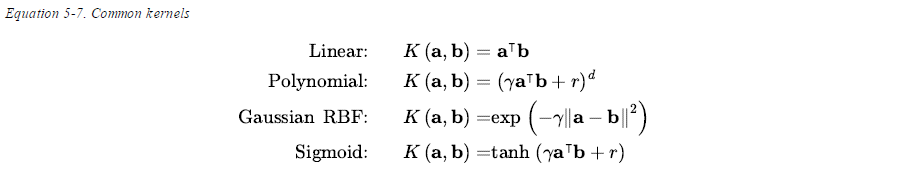

**L∆∞u √Ω: ƒê·ªãnh l√Ω Mercer (Mercer's Theorem)**

Theo ƒë·ªãnh l√Ω Mercer, n·∫øu m·ªôt h√†m $ùêæ(ùëé,ùëè)$ th·ªèa m√£n m·ªôt v√†i ƒëi·ªÅu ki·ªán to√°n h·ªçc (ƒë∆∞·ª£c g·ªçi l√† ƒëi·ªÅu ki·ªán c·ªßa Mercer), th√¨ t·ªìn t·∫°i m·ªôt h√†m √°nh x·∫° $ùúô$ m√† bi·∫øn ƒë·ªïi c√°c vector $ùëé$ v√† $ùëè$ sang m·ªôt kh√¥ng gian kh√°c (c√≥ th·ªÉ c√≥ s·ªë chi·ªÅu r·∫•t l·ªõn), sao cho $ùêæ(ùëé,ùëè)=ùúô(ùëé)^‚ä§ùúô(ùëè)$

Khi ƒë√≥, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng $ùêæ$ nh∆∞ m·ªôt h√†m kernel v√¨ b·∫°n bi·∫øt r·∫±ng $ùúô$ t·ªìn t·∫°i, ngay c·∫£ khi b·∫°n kh√¥ng bi·∫øt c·ª• th·ªÉ $ùúô$ l√† g√¨. Trong tr∆∞·ªùng h·ª£p kernel Gaussian RBF, c√≥ th·ªÉ ch·ª©ng minh r·∫±ng $ùúô$ √°nh x·∫° m·ªói ƒëi·ªÉm d·ªØ li·ªáu th√†nh m·ªôt vector trong kh√¥ng gian v√¥ h·∫°n chi·ªÅu, v√¨ v·∫≠y th·∫≠t tuy·ªát khi b·∫°n kh√¥ng c·∫ßn th·ª±c s·ª± x√¢y d·ª±ng ph√©p bi·∫øn ƒë·ªïi ƒë√≥!

M·ªôt s·ªë kernel th∆∞·ªùng d√πng (nh∆∞ kernel sigmoid) kh√¥ng th·ªèa m√£n t·∫•t c·∫£ ƒëi·ªÅu ki·ªán c·ªßa Mercer, nh∆∞ng trong th·ª±c t·∫ø ch√∫ng v·∫´n ho·∫°t ƒë·ªông kh√° t·ªët.

V·∫´n c√≤n m·ªôt ƒëi·ªÉm c·∫ßn ƒë∆∞·ª£c gi·∫£i quy·∫øt. Ph∆∞∆°ng tr√¨nh 5-4 cho th·∫•y c√°ch chuy·ªÉn t·ª´ nghi·ªám ƒë·ªëi ng·∫´u sang nghi·ªám nguy√™n th·ªßy trong b√†i to√°n SVM tuy·∫øn t√≠nh. Nh∆∞ng n·∫øu b·∫°n √°p d·ª•ng kernel trick, b·∫°n s·∫Ω nh·∫≠n ƒë∆∞·ª£c ph∆∞∆°ng tr√¨nh li√™n quan ƒë·∫øn $\mathbf{\hat{w}}$ , nh∆∞ng ta kh√¥ng th·ªÉ t√≠nh ƒë∆∞·ª£c v√¨ n√≥ n·∫±m trong kh√¥ng gian c·ªßa $ùúô(x^{(i)})$ c√≥ th·ªÉ r·∫•t l·ªõn ho·∫∑c v√¥ h·∫°n.

ƒê·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ n√†y ta c√≥ th·ªÉ th·∫ø c√¥ng th·ª©c t·ª´ 5-4 v√†o h√†m quy·∫øt ƒë·ªãnh ƒë·ªÉ nh·∫≠n ƒë∆∞·ª£c ph∆∞∆°ng tr√¨nh ch·ªâ s·ª≠ d·ª•ng t√≠ch v√¥ h∆∞·ªõng gi·ªØa c√°c vector ƒë·∫ßu v√†o. C√¥ng th·ª©c nh∆∞ sau

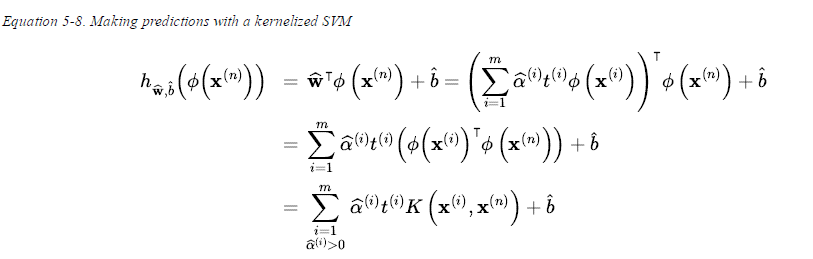

Ch·ªâ $\alpha^{(i)} \neq 0$ m·ªõi l√† support vectors,  n√™n khi d·ª± ƒëo√°n, b·∫°n ch·ªâ c·∫ßn t√≠nh t√≠ch v√¥ h∆∞·ªõng gi·ªØa ƒëi·ªÉm ƒë·∫ßu v√†o m·ªõi v√† c√°c vector h·ªó tr·ª£, ch·ª© kh√¥ng ph·∫£i to√†n b·ªô t·∫≠p hu·∫•n luy·ªán. T·∫•t nhi√™n, b·∫°n c≈©ng c·∫ßn s·ª≠ d·ª•ng kernel trick ƒë·ªÉ t√≠nh h·ªá s·ªë t·ª± do (bias term) $\mathbf{\hat{b}}$

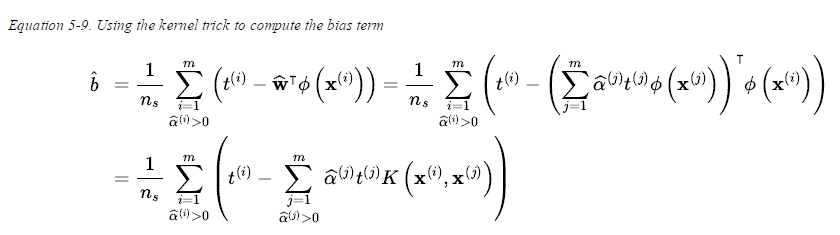

# Exercises

## 1

**Question: What is the fundamental idea behind support vector machines ?**

√ù t∆∞·ªüng c∆° b·∫£n ƒë·∫±ng sau Support Vector Machine l√† t·∫°o ra "street" gi·ªØa c√°c classes. N√≥i c√°ch kh√°c m·ª•c ti√™u l√† c√≥ margin (bi√™n ƒë·ªô) l·ªõn nh·∫•t c√≥ th·ªÉ gi·ªØa decicion boundary ph√¢n t√°ch hai l·ªõp v√† c√°c training instacnce. Khi th·ª±c hi·ªán soft margin classification, SVM t√¨m ki·∫øm s·ª± ƒë√°nh ƒë·ªïi gi·ªØa vi·ªác ph√¢n t√°ch ho√†n h·∫£o hai classes v√† "street" r·ªông nh·∫•t c√≥ th·ªÉ (m·ªôt v√†i tr∆∞·ªùng h·ª£p c√≥ th·ªÉ n·∫±m trong street). M·ªôt √Ω t∆∞·ªüng quan tr·ªçng kh√°c l√† s·ª≠ d·ª•ng kernel khi training tr√™n nonlinear datasets. SVM c≈©ng c√≥ th·ªÉ ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh ƒë·ªÉ th·ª±c hi·ªán linear v√† nonlinear regression, c≈©ng nh∆∞ ph√°t hi·ªán s·ª± m·ªõi l·∫° (novelty detection).

## 2

**Question: What is a support vector?**

Sau khi ƒë√†o t·∫°o m·ªôt m√¥ h√¨nh SVM, m·ªôt support vector l√† b·∫•t k·ª≥ instance n√†o n·∫±m tr√™n `street` (c√°c instance n·∫±m trong v√† tr√™n n√©t ƒë·ª©t). Decision boundary ƒë∆∞·ª£c x√°c ƒë·ªãnh b·ªüi c√°c support vector. B·∫•t k·ª≥ instances n√†o kh√¥ng ph·∫£i l√† support vector (n·∫±m ngo√†i `street`) ƒë·ªÅu kh√¥ng c√≥ b·∫•t k·ª≥ ·∫£nh h∆∞·ªüng n√†o, ta c√≥ th·ªÉ x√≥a, di chuy·ªÉn th√™m c√°c instance mi·ªÖn l√† n√≥ n·∫±m ngo√†i `street` th√¨ decision boundary s·∫Ω kh√¥ng ·∫£nh h∆∞·ªüng. Vi·ªác t√≠nh to√°n c√°c d·ª± ƒëo√°n b·∫±ng m·ªôt SVM ƒë∆∞·ª£c kernel h√≥a ch·ªâ li√™n quan ƒë·∫øn c√°c vect∆° h·ªó tr·ª£, kh√¥ng ph·∫£i to√†n b·ªô trainging set.

## 3

**Question: Why is it important to scale the inputs when using SVMs?**

SVMs c·ªë g·∫Øng fit v·ªõi "street" l·ªõn nh·∫•t c√≥ th·ªÉ gi·ªØa c√°c classes, v√¨ v·∫≠y n·∫øu training set kh√¥ng ƒë∆∞·ª£c chia t·ªâ l·ªá, c√°c feature nh·ªè s·∫Ω c√≥ xu h∆∞·ªõng b·ªã b·ªè qua

## 4

**Question: Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?**

S·ª≠ d·ª•ng `decision_function()` ƒë·ªÉ l·∫•y ƒëi·ªÉm tin c·∫≠y. ƒêi·ªÉm s·ªë n√†y ƒë·∫°i di·ªán cho kho·∫£ng c√°ch gi·ªØa instance v√† decision boundary. Tuy nhi√™n n√≥ kh√¥ng th·ªÉ chuy·ªÉn tr·ª±c ti·∫øp th√†nh x√°c su·∫•t l·ªõp. N·∫øu ƒë·∫∑t `probability=True` khi s·ª≠ d·ª•ng SVC, sau ƒë√≥ khi k·∫øt th√∫c training d√πng 5-fold cross-validation ƒë·ªÉ t·∫°o ƒëi·ªÉm s·ªë out-of-sample cho training samples, v√† n√≥ s·∫Ω train m·ªôt `LogisticRegression` ƒë·ªÉ g√°n c√°c gi√° tr·ªã ƒëi·ªÉm x√°c su·∫•t ∆∞·ªõc t√≠nh. Sau ƒë√≥, c√°c ph∆∞∆°ng th·ª©c `predict_proba()` v√† `predict_log_proba()` s·∫Ω kh·∫£ d·ª•ng.

## 5

**Question: How can you choose between LinearSVC, SVC, and SGDClassifier?**

C·∫£ 3 class ƒë·ªÉu d√πng ƒë·ªÉ ph√¢n lo·∫°i linear large-margin. 

L·ªõp `SVC` c≈©ng h·ªó tr·ª£ kernel trick, gi√∫p n√≥ c√≥ kh·∫£ nƒÉng x·ª≠ l√≠ c√°c t√°c v·ª• phi tuy·∫øn t√≠nh. Tuy nhi√™n `SVC` kh√¥ng m·ªü r·ªông t·ªët v·ªõi c√°c b·ªô d·ªØ li·ªáu l·ªõn. Tuy nhi√™n n√≥ m·ªü r·ªông t·ªët v·ªõi b·ªô d·ªØ li·ªáu c√≥ nhi·ªÅu feature.

L·ªõp `LinearSVC` tri·ªÉn khai thu·∫≠t to√°n ƒë√£ t·ªëi ∆∞u cho linear SVMs, trong khi `SGDClassifiers` s·ª≠ d·ª•ng SGD. T√πy thu·ªôc v√†o t·∫≠p d·ªØ li·ªáu, LinearSVC c√≥ th·ªÉ nhanh h∆°n m·ªôt ch√∫t so v·ªõi SGDClassifier, nh∆∞ng kh√¥ng ph·∫£i l√∫c n√†o c≈©ng v·∫≠y, v√† SGDClassifier linh ho·∫°t h∆°n, c·ªông v·ªõi vi·ªác n√≥ h·ªó tr·ª£ h·ªçc gia tƒÉng.

## 6

**Question: Say you‚Äôve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you
increase or decrease Œ≥ (gamma)? What about C?**

N·∫øu m·ªôt `SVM Classifier` ƒë∆∞·ª£c train v·ªõi m·ªôt `kernel RBF` underfit v·ªõi training set, c√≥ th·ªÉ c√≥ qu√° nhi·ªÅu regularization. ƒê·ªÉ gi·∫£m n√≥, b·∫°n c·∫ßn tƒÉng gamma ho·∫∑c C (ho·∫∑c c·∫£ hai).

## 7

**Question: What does it mean for a model to be œµ-insensitive?**

M·ªôt m√¥ h√¨nh `Regression SVM` c·ªë g·∫Øng ƒë∆∞a c√†ng nhi·ªÅu instance v√†o m·ªôt bi√™n ƒë·ªô nh·ªâ xung quanh ƒë∆∞·ªùng d·ª± ƒëo√°n c·ªßa n√≥. N·∫øu th√™m c√°c instance v√†o b√™n trong bi√™n ƒë·ªô n√†y, m√¥ h√¨nh kh√¥ng b·ªã ·∫£nh h∆∞·ªùng th√¨ g·ªçi l√† `œµ-insensitive`

## 8

**Question: What is the point of using the kernel trick?**

Kernel trick l√† m·ªçt k·ªπ thu·∫≠t to√°n h·ªçc gi√∫p ta train ƒë∆∞·ª£c c√°c m√¥ h√¨nh `nonlinear SVM`. M√¥ h√¨nh k·∫øt qu·∫£ t∆∞∆°ng ƒë∆∞∆°ng v·ªõi vi·ªác √°nh x·∫° c√°c ƒë·∫ßu v√†o sang m·ªôt kh√¥ng gian kh√°c b·∫±ng c√°ch s·ª≠ d·ª•ng ph√©p bi·∫øn ƒë·ªïi phi tuy·∫øn t√≠nh, sau ƒë√≥ ƒë√†o t·∫°o `linear SVM` tr√™n k·∫øt qu·∫£ l√† c√°c ƒë·∫ßu v√†o high-dimensional.

## 9


**Question: Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.**

In [23]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = iris.target # type: ignore

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Now let's build and train 3 models:
* Remember that `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models to produce similar results, we need to set `loss="hinge"`.
* Also, the `SVC` class uses an RBF kernel by default, so we need to set `kernel="linear"` to get similar results as the other two models.
* Lastly, the `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [24]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

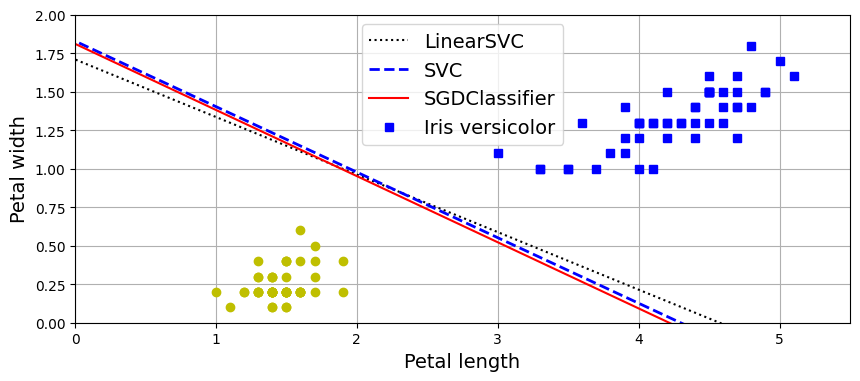

In [25]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

plt.figure(figsize=(10, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis((0, 5.5, 0, 2))
plt.grid()

plt.show()

## 10

**Question: Train an SVM classifier on the wine dataset, which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine‚Äôs chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?**

In [26]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [27]:
print(wine.DESCR) # type: ignore

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42 # type: ignore
)

In [29]:
X_train.head()

alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
100    12.08        2.08  1.70  ...  1.27                          2.96    710.0
122    12.42        4.43  2.73  ...  0.92                          3.12    365.0
154    12.58        1.29  2.10  ...  0.58                          1.55    640.0
51     13.83        1.65  2.60  ...  1.24                          3.37   1265.0

[5 rows x 13 columns]

In [30]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

In [31]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, random_state=42)

In [32]:
# failed to converge, try increasing the number of iterations
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, max_iter=1000000, random_state=42)

Sau 1 tri·ªáu v√≤ng l·∫∑p v·∫´n ch∆∞a h·ªôi t·ª•. C·∫ßn xem x√©t c√°c v·∫•n ƒë·ªÅ kh√°c, tr∆∞·ªõc h·∫øt t√≠nh `cross_val_score` c·ªßa m√¥ h√¨nh.

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


np.float64(0.90997150997151)

91% l√† k·∫øt qu·∫£ ch∆∞a t·ªët

**Always remember to scale the features when using SVMs:**

In [34]:
lin_clf = make_pipeline(
    StandardScaler(), LinearSVC(dual=True, random_state=42))

lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [35]:
cross_val_score(lin_clf, X_train, y_train).mean()

np.float64(0.9774928774928775)

In [36]:
cross_val_score(lin_clf, X_test, y_test).mean()

np.float64(0.9777777777777779)

In [37]:
lin_clf.score(X_test, y_test)

0.9777777777777777

In [38]:
# Let's see if a kernelized SVM will do better.

svm_clf = make_pipeline(
    StandardScaler(), 
    SVC(random_state=42)
)

cross_val_score(svm_clf, X_train, y_train).mean()

np.float64(0.9698005698005698)

In [39]:
# fine tune the hyperparameters using RandomizedSearchCV
import re
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

param_distrib = {
    "svc__gamma": loguniform(1e-3, 1e-1),
    "svc__C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=np.float64(9.925589984899778),
                     gamma=np.float64(0.011986281799901188),
                     random_state=42))])

In [40]:
rnd_search_cv.best_score_

np.float64(0.9925925925925926)

In [41]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

***This tuned kernelized SVM performs better than the `LinearSVC` model, but we get a lower score on the test set than we measured using cross-validation. This is quite common: since we did so much hyperparameter tuning, we ended up slightly overfitting the cross-validation test sets. It's tempting to tweak the hyperparameters a bit more until we get a better result on the test set, but this would probably not help, as we would just start overfitting the test set. Anyway, this score is not bad at all, so let's stop here.***

## 11

**Question: Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using `sklearn.datasets.fetch_california_housing()`. The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model‚Äôs RMSE?**

In [42]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing.data # type: ignore
y = housing.target # type: ignore

X.head()

MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

In [44]:
from sklearn.svm import LinearSVC

lin_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(dual=True, random_state=42)
)
lin_svr.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(dual=True, random_state=42))])

In [45]:
# try increase max_iter
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [53]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error


y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse


0.9795654478293855

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025DAD7F5B70>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025DAD7F49D0>},
                   random_state=42)

In [58]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58834964, 0.57468024, 0.58084857, 0.57109511, 0.59853088])

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5854732265172243

: 

T·ªët h∆°n SVM